In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import os,sys
import cv2
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from keras import initializers
from tensorflow.keras.optimizers import Adam, SGD, Adagrad, RMSprop
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, TensorBoard
from tensorflow.keras.models import Sequential

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input

In [ ]:
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array

In [ ]:
from keras.applications.vgg19 import VGG19

In [ ]:

#print('Initializer: ',initializer)

def Upload_Dataset(Dataset_Path):

    Path_train_Dataset = Dataset_Path+"/train"
    Path_test_Dataset = Dataset_Path+"/test"
    Path_val_Dataset = Dataset_Path+"/val"

    Input_train_Dataset, Input_test_Dataset, Input_val_Dataset = [], [], []
    Output_train, Output_test, Output_val = [], [], []

    for j in os.listdir(Path_train_Dataset):

        if j != ".DS_Store":
            #print(j)
            for k in os.listdir(Path_train_Dataset+"/"+j):
                img=cv2.imread(Path_train_Dataset+"/"+j+"/"+k)
                Input_train_Dataset.append(cv2.resize(img, (224, 224)))
                if(j == 'brain'):
                    #print('0 Entered ',j)
                    Output_train.append(int(0))
                elif(j == 'ewer'):
                    #print('1 Entered ',j)
                    Output_train.append(int(1))
                elif(j == 'helicopter'):
                    #print('2 Entered ',j)
                    Output_train.append(int(2))
                elif(j == 'scorpion'):
                    #print('3 Entered ',j)
                    Output_train.append(int(3))
                else:
                    #print('4 Entered ',j)
                    Output_train.append(int(4))

            for k in os.listdir(Path_test_Dataset+"/"+j):
                img=cv2.imread(Path_test_Dataset+"/"+j+"/"+k)
                Input_test_Dataset.append(cv2.resize(img, (224, 224)))
                if(j == 'brain'):
                    Output_test.append(int(0))
                elif(j == 'ewer'):
                    Output_test.append(int(1))
                elif(j == 'helicopter'):
                    Output_test.append(int(2))
                elif(j == 'scorpion'):
                    Output_test.append(int(3))
                else:
                    Output_test.append(int(4))

            for k in os.listdir(Path_val_Dataset+"/"+j):
                img=cv2.imread(Path_val_Dataset+"/"+j+"/"+k)
                Input_val_Dataset.append(cv2.resize(img, (224, 224)))
                if(j == 'brain'):
                    Output_val.append(int(0))
                elif(j == 'ewer'):
                    Output_val.append(int(1))
                elif(j == 'helicopter'):
                    Output_val.append(int(2))
                elif(j == 'scorpion'):
                    Output_val.append(int(3))
                else:
                    Output_val.append(int(4))

    #print(Output_train)
    Input_train_Dataset, Input_test_Dataset, Input_val_Dataset = np.array(Input_train_Dataset), np.array(Input_test_Dataset), np.array(Input_val_Dataset)
    #Output_train, Output_test, Output_val = np.array(list(map(int, Output_train))), np.array(list(map(int, Output_test))), np.array(list(map(int, Output_val)))
    Output_train, Output_test, Output_val = np.array(Output_train), np.array(Output_test), np.array(Output_val)
    #print(Output_train)
    return Input_train_Dataset, Input_test_Dataset,Input_val_Dataset, Output_train, Output_test, Output_val



#providing path of  MNIST dataset
Dataset_Path = "/content/drive/MyDrive/DLA5/Group_1"


#calling Upload_Dataset function
trainInp, testInp,valInp, trainOut, testOut, valOut= Upload_Dataset(Dataset_Path)



In [ ]:
trainIp=tf.convert_to_tensor(trainInp, dtype=tf.int64)
testIp=tf.convert_to_tensor(testInp, dtype=tf.int64)
valIp=tf.convert_to_tensor(valInp, dtype=tf.int64)
trainOt=tf.convert_to_tensor(trainOut, dtype=tf.int64)
valOt=tf.convert_to_tensor(valOut, dtype=tf.int64)
testOt=tf.convert_to_tensor(testOut, dtype=tf.int64)

In [ ]:
trainInp=trainInp/255
testInp=testInp/255
valInp=valInp/255

In [ ]:
import ssl

ssl._create_default_https_context = ssl._create_unverified_context

In [ ]:
trainInp=x = preprocess_input(trainInp)

In [ ]:
vgg19=VGG19(weights="imagenet")
for layer in vgg19.layers:
    layer.trainable = False
vgg19.summary()


574710816/574710816 [==============================] - 3s 0us/step
Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                            

In [ ]:
pip install visualkeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 992.0/992.0 kB 16.2 MB/s eta 0:00:00


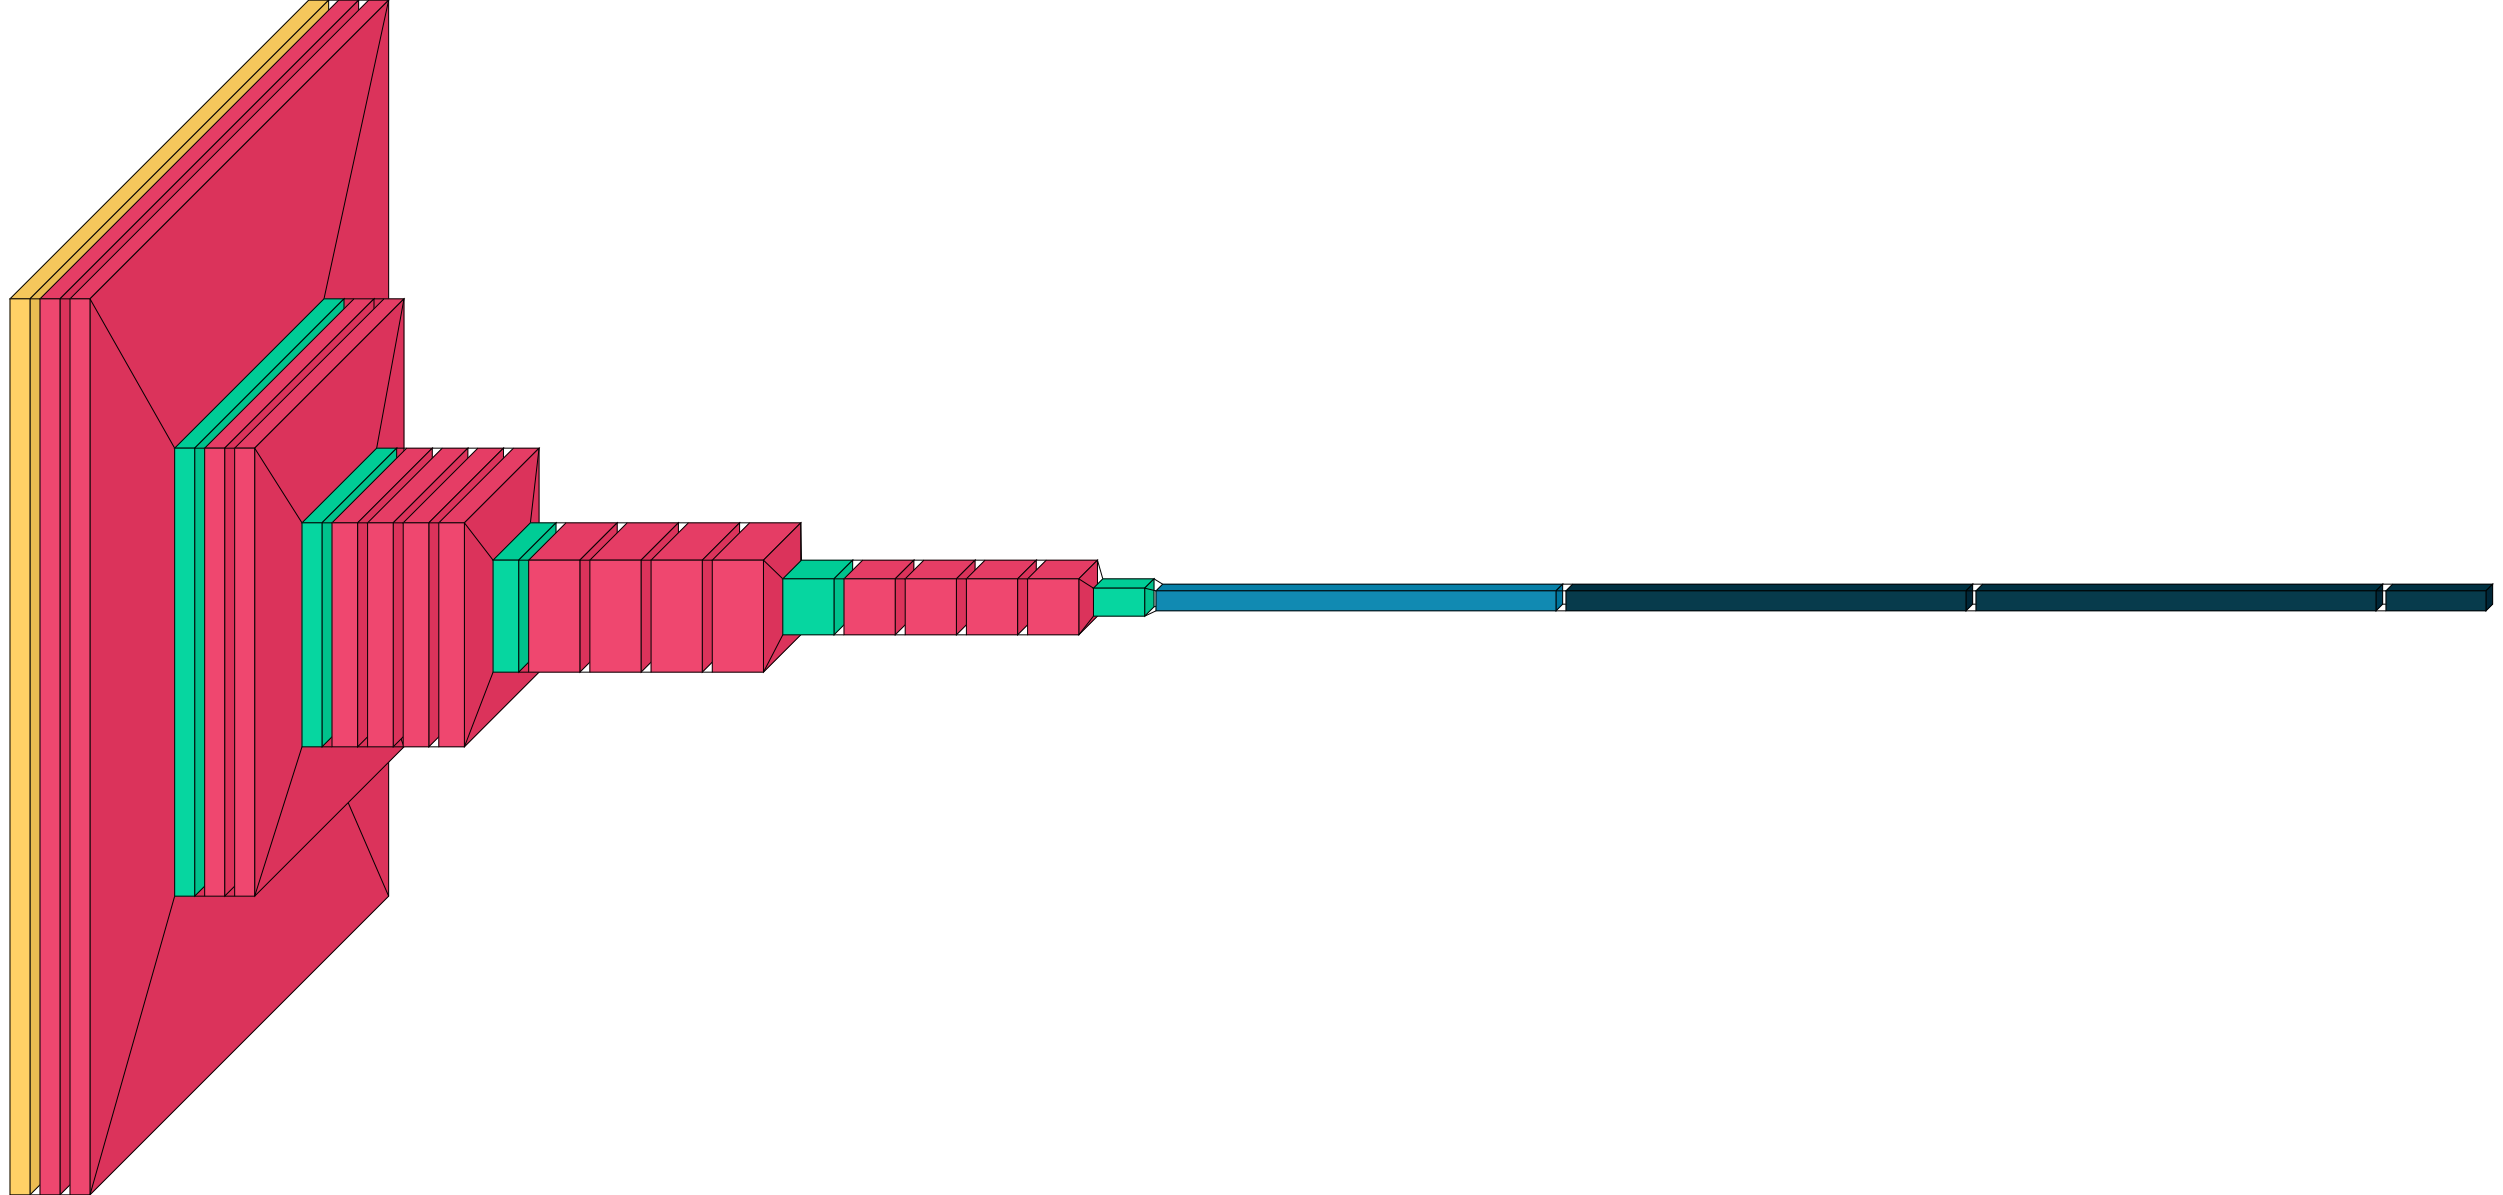

In [ ]:
import visualkeras
visualkeras.layered_view(vgg19)

In [ ]:
#x = Flatten()(vgg19.output)
#l1 = Dense(4096, activation='sigmoidal')(x)
#l2 = Dense(4096, activation='sigmoidal')(l1)
x = vgg19.get_layer('fc2').output
#x = GlobalAveragePooling2D()(x)
#l1 = Dense(4096, activation='relu')(x)
#l2 = Dense(4096, activation='relu')(l1)
prediction = Dense(5, activation='softmax')(x)
model = Model(inputs=vgg19.input, outputs=prediction)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
es = EarlyStopping(monitor='loss',min_delta=0.0001, patience=2,verbose=1)
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(x = trainInp, y = trainOut, batch_size = 32, epochs = 100, verbose = "auto", callbacks=[es], validation_data=(valInp,  valOut), validation_batch_size=1)

#Evaluating the model
print('\nEvaluation of model on train data:')
trainAcc=model.evaluate(x=trainInp,y=trainOut,batch_size=1, verbose="auto",callbacks=None)
print(model.metrics_names)
print(trainAcc)

print('\nEvaluation of model on validation data:')
valAcc=model.evaluate(x=valInp, y=valOut, batch_size=1, verbose="auto",callbacks=None)
print(model.metrics_names)
print(valAcc)

print('\nEvaluation of model on test data:')
testAcc=model.evaluate(x=testInp, y=testOut, batch_size=1, verbose="auto",callbacks=None)
print(model.metrics_names)
print(testAcc)

print('\nPredictions for test data:')
testProb=model.predict(testInp, batch_size=1, verbose="auto", callbacks=None)
pred=np.argmax(testProb,axis=1)


#3-3
confusionMatrix=tf.math.confusion_matrix(testOut,pred)
print(confusionMatrix)

Epoch 1/100
8/8 [==============================] - 238s 30s/step - loss: 0.9588 - accuracy: 0.7320 - val_loss: 0.2029 - val_accuracy: 0.9400
Epoch 2/100
8/8 [==============================] - 276s 36s/step - loss: 0.0159 - accuracy: 1.0000 - val_loss: 0.1643 - val_accuracy: 0.9400
Epoch 3/100
8/8 [==============================] - 265s 32s/step - loss: 0.0047 - accuracy: 1.0000 - val_loss: 0.1417 - val_accuracy: 0.9400
Epoch 4/100
8/8 [==============================] - 277s 36s/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.1306 - val_accuracy: 0.9400
Epoch 5/100
8/8 [==============================] - 283s 37s/step - loss: 9.4370e-04 - accuracy: 1.0000 - val_loss: 0.1261 - val_accuracy: 0.9400
Epoch 6/100
8/8 [==============================] - 281s 36s/step - loss: 6.5040e-04 - accuracy: 1.0000 - val_loss: 0.1263 - val_accuracy: 0.9400
Epoch 7/100
8/8 [==============================] - 245s 31s/step - loss: 4.8248e-04 - accuracy: 1.0000 - val_loss: 0.1286 - val_accuracy: 0.9400
E

In [ ]:
conv_layer_index = [0] #[0, 1]
outputs = [model.layers[i].output for i in conv_layer_index]
New_Model = Model(inputs=model.inputs, outputs=outputs)
print(New_Model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
layer_names = [layer.name for layer in model.layers]
layer_names

['input_1',
 'block1_conv1',
 'block1_conv2',
 'block1_pool',
 'block2_conv1',
 'block2_conv2',
 'block2_pool',
 'block3_conv1',
 'block3_conv2',
 'block3_conv3',
 'block3_conv4',
 'block3_pool',
 'block4_conv1',
 'block4_conv2',
 'block4_conv3',
 'block4_conv4',
 'block4_pool',
 'block5_conv1',
 'block5_conv2',
 'block5_conv3',
 'block5_conv4',
 'block5_pool',
 'flatten',
 'fc1',
 'fc2',
 'dense']

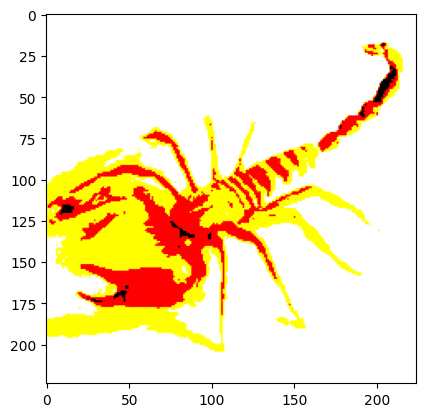

In [ ]:
img=trainInp[158]
plt.imshow(img)
image = img_to_array(img)
x = np.expand_dims(image, axis=0)
x= tf.convert_to_tensor(x)

1/1 [==============================] - 2s 2s/step


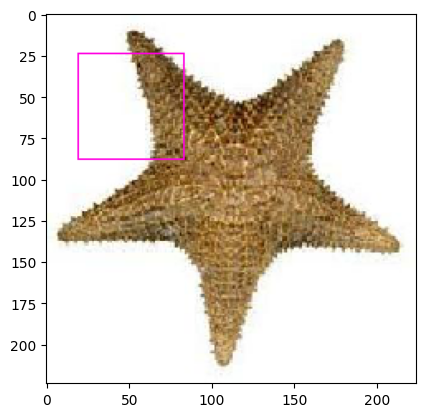

In [ ]:
# Select the layer to visualize
last_conv_layer = model.get_layer('block5_conv4')

# Define the gradient model
grad_model = keras.models.Model([model.inputs], [last_conv_layer.output, model.output])

# Load an image
img_path = '/content/drive/MyDrive/DLA5/Group_1/train/starfish/image_0011.jpg'
img = keras.preprocessing.image.load_img(img_path, target_size=(224, 224))
img_array = keras.preprocessing.image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
preds = model.predict(img_array)
class_idx = np.argmax(preds[0])

# Generate the heatmap
with tf.GradientTape() as tape:
    conv_outputs, predictions = grad_model(img_array)
    loss = predictions[:, class_idx]

grads = tape.gradient(loss, conv_outputs)[0]
guided_grads = (tf.cast(conv_outputs > 0, "float32") * tf.cast(grads > 0, "float32") * grads)

heatmap = tf.reduce_mean(guided_grads, axis=(0, 1))
# Add two dimensions to the heatmap tensor
heatmap = tf.expand_dims(tf.expand_dims(heatmap, 0), -1)
# Resize the heatmap to match the size of the input image
heatmap = tf.image.resize(heatmap, size=(img_array.shape[1], img_array.shape[2]))
# Remove the extra dimensions added above
heatmap = tf.squeeze(heatmap)
# Normalize the heatmap
heatmap = heatmap.numpy()
heatmap /= np.max(heatmap)

# Get the top activations
num_patches = 5 # Change this value to change the number of patches to visualize
patch_size = 32 # Change this value to change the size of the patches
top_activations = []
for i in range(num_patches):
    activation_value = np.max(heatmap)
    if activation_value == 0:
        break
    row, col = np.unravel_index(np.argmax(heatmap), heatmap.shape)
    top_activations.append((row, col, activation_value))
    heatmap[max(0, row-patch_size):min(img_array.shape[0], row+patch_size),
            max(0, col-patch_size):min(img_array.shape[1], col+patch_size)] = 0

# Overlay the patches on the input image
border_color = (255, 0, 225) # Change this value to change the color of the patch borders
border_thickness = 1 # Change this value to change the thickness of the patch borders
img_with_patches = img_array[0].copy()
for (row, col, activation_value) in top_activations:
    patch = img_array[0, max(0, row-patch_size):min(img_array.shape[0], row+patch_size),
                       max(0, col-patch_size):min(img_array.shape[1], col+patch_size)]
    cv2.rectangle(img_with_patches, (col-patch_size, row-patch_size),
                  (col+patch_size, row+patch_size), border_color, border_thickness)

# Display the input image with patches
plt.imshow(np.uint8( img_with_patches))
plt.show()

1/1 [==============================] - 0s 30ms/step


IndexError: ignored

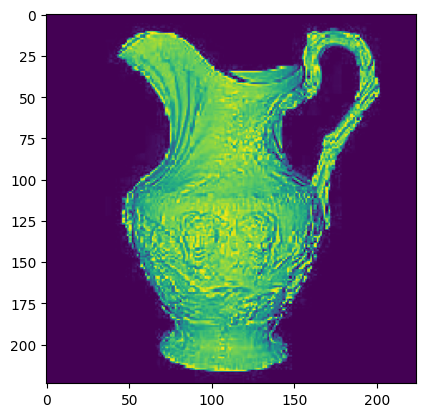

In [ ]:
img = load_img('/content/drive/MyDrive/DLA5/Group_1/train/ewer/image_0040.jpg', target_size=(224, 224))
img_tensor = img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
feature_output = New_Model.predict(img_tensor)
for ftr in feature_output:
    for i in range(8):
        plt.imshow(ftr[:, :, i]) #ftr[0, :, :, i]

1/1 [==============================] - 1s 774ms/step


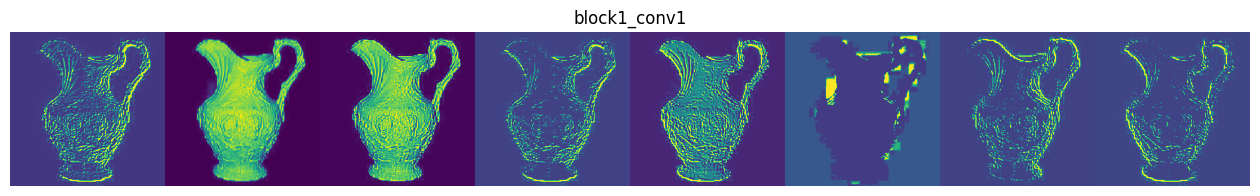

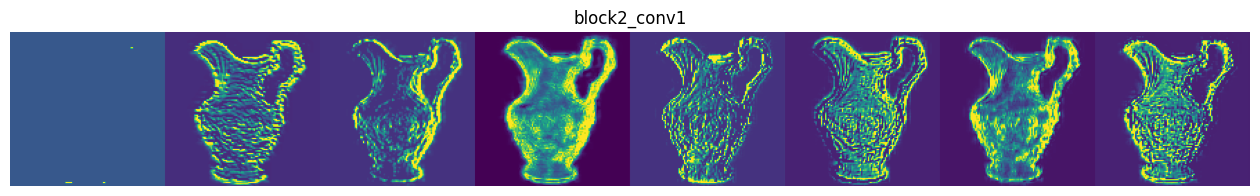

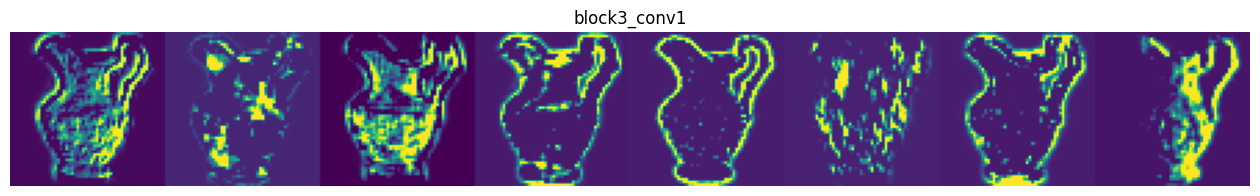

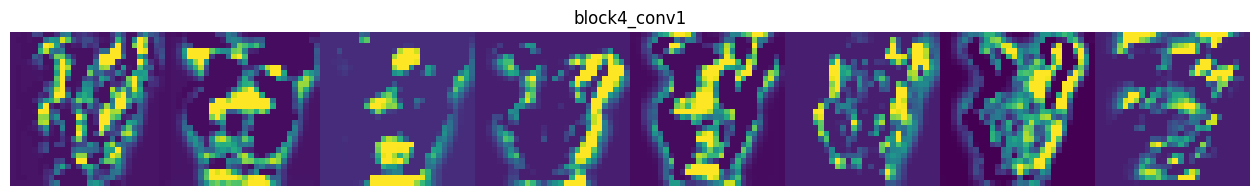

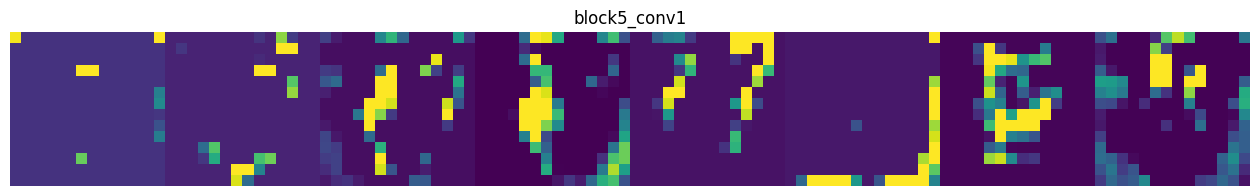

In [ ]:
layer_names = ['block1_conv1', 'block2_conv1','block3_conv1', 'block4_conv1','block5_conv1']

layer_outputs = [layer.output for layer in model.layers if layer.name in layer_names]
activation_model = Model(inputs=model.input, outputs=layer_outputs)
intermediate_activations = activation_model.predict(img_tensor)

images_per_row = 8
max_images = 8
# Now let's display our feature maps
for layer_name, layer_activation in zip(layer_names, intermediate_activations):
    # This is the number of features in the feature map
    n_features = layer_activation.shape[-1]
    n_features = min(n_features, max_images)

    # The feature map has shape (1, size, size, n_features)
    size = layer_activation.shape[1]

    # We will tile the activation channels in this matrix
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))

    # We'll tile each filter into this big horizontal grid
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            # Post-process the feature to make it visually palatable
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,
                         row * size : (row + 1) * size] = channel_image

    # Display the grid
    scale = 2. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.axis('off')
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto')

plt.show()

#GradCam

In [ ]:
import tensorflow.keras.backend as K
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import cv2
from skimage.transform import resize

In [ ]:
from keras.applications.vgg19 import VGG19

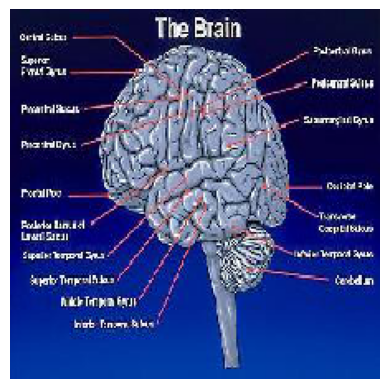

In [ ]:
path = '/content/drive/MyDrive/DLA5/Group_1/train/brain/image_0003.jpg'
image = tf.keras.preprocessing.image.load_img(path, target_size=(224, 224))
plt.axis("off")
plt.imshow(image)
plt.show()

In [ ]:
img =  tf.keras.preprocessing.image.img_to_array(image)
x = np.expand_dims(img, axis=0)
preprocessed_input = tf.keras.applications.vgg19.preprocess_input(x)

In [ ]:
model = tf.keras.applications.vgg19.VGG19(weights='imagenet', include_top=True)

In [ ]:
layername='block5_conv4'

gb_model = tf.keras.models.Model(
    inputs = [model.inputs],
    outputs = [model.get_layer(layername).output])
layer_dict = [layer for layer in gb_model.layers[1:] if hasattr(layer,'activation')]

@tf.custom_gradient
def guidedRelu(x):
    def grad(dy):
        return tf.cast(dy>0,"float32") * tf.cast(x>0, "float32") * dy
    return tf.nn.relu(x), grad

for layer in layer_dict:
    if layer.activation == tf.keras.activations.relu:
        layer.activation = guidedRelu

with tf.GradientTape() as tape:
    inputs = tf.cast(preprocessed_input, tf.float32)
    tape.watch(inputs)
    outputs = gb_model(inputs)[0]
grads = tape.gradient(outputs,inputs)[0]

In [ ]:
weights = tf.reduce_mean(grads, axis=(0, 1))
grad_cam = np.ones(outputs.shape[0: 2], dtype = np.float32)
for i, w in enumerate(weights):
    grad_cam += w * outputs[:, :, i]

In [ ]:
weights = tf.reduce_mean(grads, axis=(0, 1))
grad_cam = np.ones(outputs.shape[0: 2], dtype = np.float32)
for i, w in enumerate(weights):
    grad_cam += w * outputs[:, :, i]

In [ ]:
grad_cam_img = cv2.resize(grad_cam.numpy(), (224, 224))
grad_cam_img = np.maximum(grad_cam_img, 0)
heatmap = (grad_cam_img - grad_cam_img.min()) / (grad_cam_img.max() - grad_cam_img.min())
grad_cam_img = cv2.applyColorMap(np.uint8(255*heatmap), cv2.COLORMAP_JET)
output_image = cv2.addWeighted(cv2.cvtColor(img.astype('uint8'), cv2.COLOR_RGB2BGR), 0.5, grad_cam_img, 1, 0)

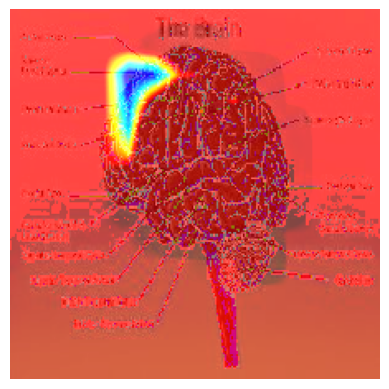

In [ ]:
plt.imshow(output_image)
plt.axis("off")
plt.show()

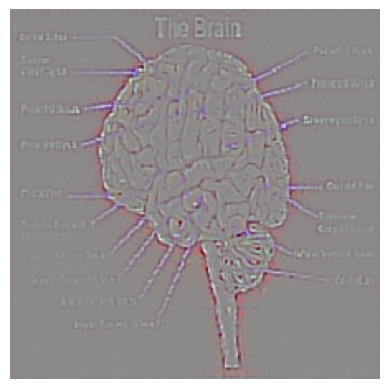

In [ ]:
guided_back_prop =grads
gb_viz = np.dstack((
            guided_back_prop[:, :, 0],
            guided_back_prop[:, :, 1],
            guided_back_prop[:, :, 2],
        ))
gb_viz -= np.min(gb_viz)
gb_viz /= gb_viz.max()
imgplot = plt.imshow(gb_viz)
plt.axis("off")
plt.show()

# Visualizing intermediate activations

In [ ]:
for ftr in feature_output:
    for i in range(8):
        plt.imshow(ftr[:, :, i]) #ftr[0, :, :, i]

In [ ]:
img = load_img('/content/drive/MyDrive/DLA5/Group_1/train/scorpion/image_0018.jpg', target_size=(224, 224))
img_tensor = img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
feature_output = New_Model.predict(img_tensor)


1/1 [==============================] - 0s 96ms/step


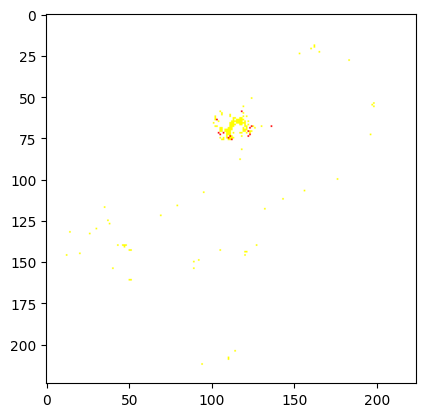

In [ ]:
plt.imshow(img_tensor[0])
plt.show()

1/1 [==============================] - 0s 23ms/step


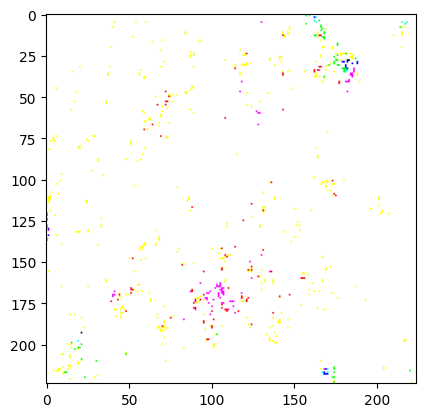

In [ ]:
img = load_img('/content/drive/MyDrive/DLA5/Group_1/train/starfish/image_0018.jpg', target_size=(224, 224))
img_tensor = img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
feature_output = New_Model.predict(img_tensor)
plt.imshow(img_tensor[0])
plt.show()

1/1 [==============================] - 1s 719ms/step
(1, 224, 224, 64)


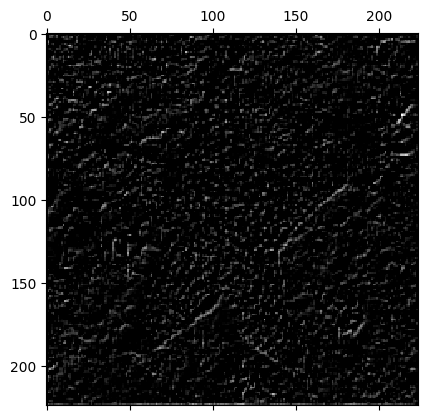

In [ ]:
layer_names = ['block1_conv1', 'block2_conv1','block3_conv1', 'block4_conv1','block5_conv1']

layer_outputs = [layer.output for layer in model.layers if layer.name in layer_names]
activation_model = Model(inputs=model.input, outputs=layer_outputs)
intermediate_activations = activation_model.predict(img_tensor)

first_layer_activation = intermediate_activations[0]
print(first_layer_activation.shape)

plt.matshow(first_layer_activation[0, :, :, 3], cmap='gray')
plt.show()

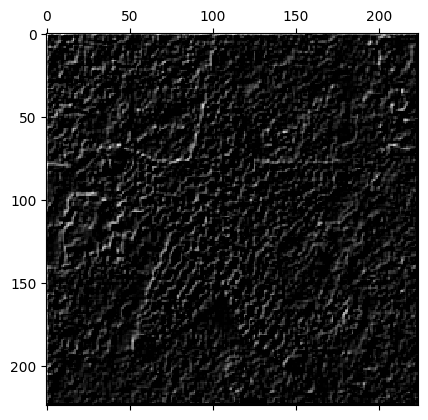

In [ ]:
plt.matshow(first_layer_activation[0, :, :, 30], cmap='gray')
plt.show()

1/1 [==============================] - 1s 723ms/step


<ipython-input-72-3ee4ed577c70>:30: RuntimeWarning: invalid value encountered in true_divide
  channel_image /= channel_image.std()


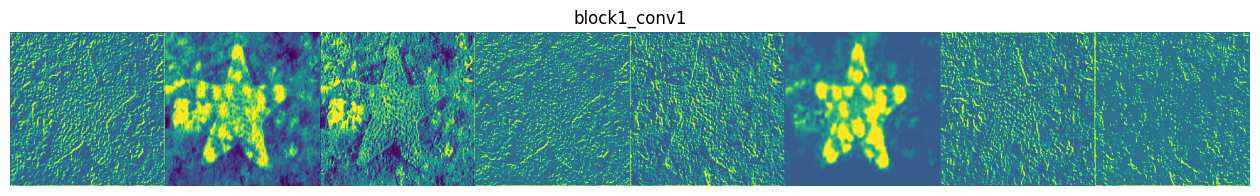

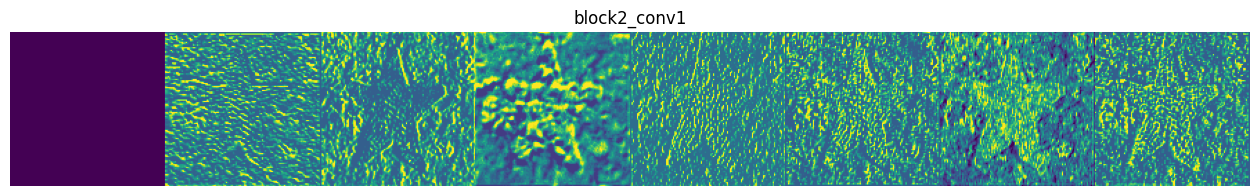

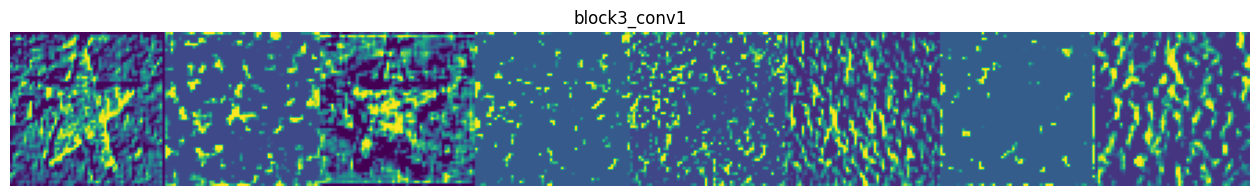

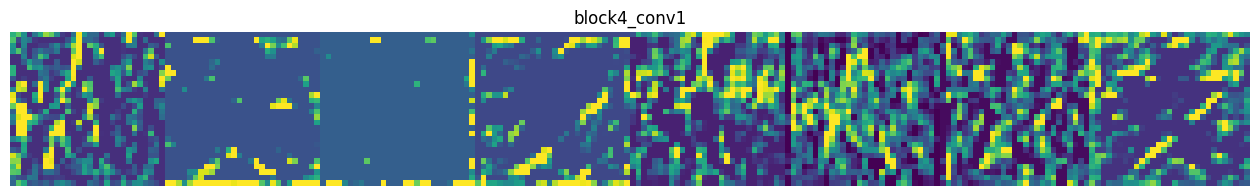

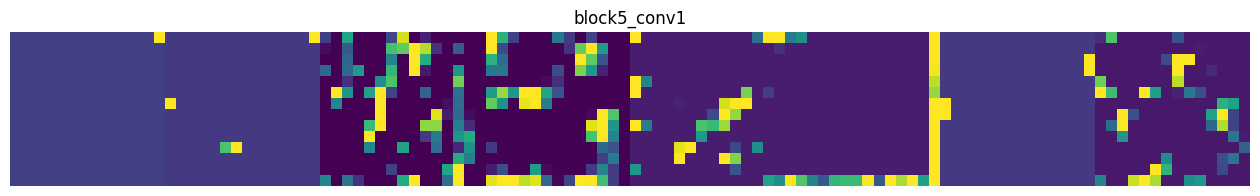

In [ ]:
layer_names = ['block1_conv1', 'block2_conv1','block3_conv1', 'block4_conv1','block5_conv1']

layer_outputs = [layer.output for layer in model.layers if layer.name in layer_names]
activation_model = Model(inputs=model.input, outputs=layer_outputs)
intermediate_activations = activation_model.predict(img_tensor)

images_per_row = 8
max_images = 8
# Now let's display our feature maps
for layer_name, layer_activation in zip(layer_names, intermediate_activations):
    # This is the number of features in the feature map
    n_features = layer_activation.shape[-1]
    n_features = min(n_features, max_images)

    # The feature map has shape (1, size, size, n_features)
    size = layer_activation.shape[1]

    # We will tile the activation channels in this matrix
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))

    # We'll tile each filter into this big horizontal grid
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            # Post-process the feature to make it visually palatable
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,
                         row * size : (row + 1) * size] = channel_image

    # Display the grid
    scale = 2. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.axis('off')
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto',cmap='viridis')

plt.show()

https://github.com/ardendertat/Applied-Deep-Learning-with-Keras/blob/master/notebooks/Part%204%20(GPU)%20-%20Convolutional%20Neural%20Networks.ipynb

https://github.com/NiteshMethani/Deep-Learning-CS7015/blob/master/CNN/code/Guided_Backpropogation/3.3%20Guided%20Backpropagation.ipynb

https://github.com/yosuah/vgg_deconv_vis/blob/master/Visualise%20convolution%20kernels.ipynb

Guided back propogation

In [ ]:
import torch
from torch import nn
from torchvision import models, transforms
from PIL import Image
import matplotlib.pyplot as plt


class Guided_backprop():
    def __init__(self, model):
        self.model = model
        self.image_reconstruction = None # store R0
        self.activation_maps = []  # store f1, f2, ...
        self.model.eval()
        self.register_hooks()

    def register_hooks(self):
        def first_layer_hook_fn(module, grad_in, grad_out):
            self.image_reconstruction = grad_in[0]

        def forward_hook_fn(module, input, output):
            self.activation_maps.append(output)

        def backward_hook_fn(module, grad_in, grad_out):
            grad = self.activation_maps.pop()
            # for the forward pass, after the ReLU operation,
            # if the output value is positive, we set the value to 1,
            # and if the output value is negative, we set it to 0.
            grad[grad > 0] = 1

            # grad_out[0] stores the gradients for each feature map,
            # and we only retain the positive gradients
            positive_grad_out = torch.clamp(grad_out[0], min=0.0)
            new_grad_in = positive_grad_out * grad

            return (new_grad_in,)


        # AlexNet model
        modules = list(self.model.features.named_children())

        # travese the modules，register forward hook & backward hook
        # for the ReLU
        for name, module in modules:
            if isinstance(module, nn.ReLU):
                module.register_forward_hook(forward_hook_fn)
                module.register_backward_hook(backward_hook_fn)

        # register backward hook for the first conv layer
        first_layer = modules[0][1]
        first_layer.register_backward_hook(first_layer_hook_fn)

    def visualize(self, input_image, target_class):
        model_output = self.model(input_image)
        self.model.zero_grad()
        pred_class = model_output.argmax().item()

        grad_target_map = torch.zeros(model_output.shape,
                                      dtype=torch.float)
        if target_class is not None:
            grad_target_map[0][target_class] = 1
        else:
            grad_target_map[0][pred_class] = 1

        model_output.backward(grad_target_map)

        result = self.image_reconstruction.data[0].permute(1,2,0)
        return result.numpy()

def normalize(image):
    norm = (image - image.mean())/image.std()
    norm = norm * 0.1
    norm = norm + 0.5
    norm = norm.clip(0, 1)
    return norm




In [ ]:

image = Image.open('/content/drive/MyDrive/DLA5/Group_1/train/ewer/image_0004.jpg')


transform = transforms.Compose([
    transforms.Resize(224),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])

 Architecture:
 ------------------------------------------------------------ 
 VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(i

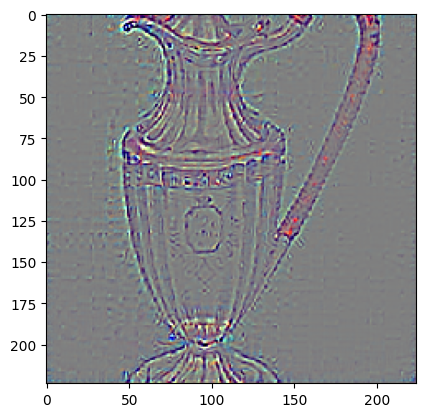

In [ ]:
tensor = transform(image).unsqueeze(0).requires_grad_()

model = models.vgg19(pretrained=True)
print(' Architecture:\n', '-'*60, '\n', model, '\n', '-'*60)

guided_bp = Guided_backprop(model)
result = guided_bp.visualize(tensor, None)

result = normalize(result)
plt.imshow(result)
plt.show()

#Method 2

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.models import load_model
from keras import backend as K
import tensorflow.compat.v1 as tf1
from tensorflow.python.framework import ops

In [ ]:
img=trainInp[200]
print(img.shape)

(224, 224, 3)


In [ ]:
image =  tf.keras.preprocessing.image.img_to_array(img)
x = np.expand_dims(image, axis=0)
preprocessed_input = tf.keras.applications.vgg19.preprocess_input(x)

In [ ]:
last_conv_layer_name = "block5_conv4"

In [ ]:
grad_model = Model(inputs=vgg19.inputs, outputs=vgg19.get_layer('block5_conv4').output)
grad_model1 = grad_model.predict(trainInp)
print(grad_model1.shape)

8/8 [==============================] - 187s 23s/step
(250, 14, 14, 512)


In [ ]:
grad_model = tf.keras.models.Model(
        [model.inputs], [model.get_layer(last_conv_layer_name).output, model.output]
    )
grad_model1 = tf.keras.models.Model(
        [model.inputs], [model.get_layer('block1_conv1').output, model.output]
    )
inputs = tf.cast(preprocessed_input, tf.float32)
#inp=grad_model1(inputs)
with tf.GradientTape() as tape:
    tape.watch(inputs)
    output=grad_model(inputs)[0]
    print('Output: ',output)
grad=tape.gradient(output,inputs)[0]
#print(grad)

AttributeError: ignored

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import cv2
import matplotlib.pyplot as plt

# Load the VGG19 model
model = keras.applications.vgg19.VGG19(weights='imagenet', include_top=True)

# Select the layer whose output we want to visualize
layer_name = 'block5_conv4'
layer = model.get_layer(layer_name)

# Define a custom gradient function for guided backpropagation
@tf.custom_gradient
def guided_relu(x):
    def grad(dy):
        return tf.cast(dy>0, dtype=tf.float32) * tf.cast(x>0, dtype=tf.float32) * dy
    return tf.nn.relu(x), grad

# Replace ReLU activations in the VGG19 model with guided ReLU activations
for layer in model.layers:
    if isinstance(layer, keras.layers.ReLU):
        layer.activation = guided_relu

# Load the image
img_path = '/content/drive/MyDrive/DLA5/Group_1/train/brain/image_0001.jpg'
img = cv2.imread(img_path)

# Preprocess the image for the VGG19 model
img = cv2.resize(img, (224, 224))
img = keras.applications.vgg19.preprocess_input(img)

# Compute the activations of the selected layer for the input image
activations = model.predict(np.expand_dims(img, axis=0))
activations = activations[0]

# Select the five neurons whose influence we want to visualize
neuron_indices = [10, 20, 30, 40, 50]

# Compute the gradient images for each of the five neurons using guided backpropagation
gradient_images = []
for i in neuron_indices:
    with tf.GradientTape() as tape:
        tape.watch(img)
        neuron_output = layer.output[:, :, :, i]
        class_output = model.output[:, i]
        gradients = tape.gradient(neuron_output, img, class_output)
        gradient_image = np.squeeze(gradients.numpy())
        gradient_image = np.maximum(gradient_image, 0)
        gradient_image /= np.max(gradient_image)
    gradient_images.append(gradient_image)

# Visualize the gradient images for each of the five neurons
fig, axes = plt.subplots(1, 5, figsize=(20, 10))
for i, ax in enumerate(axes):
    ax.imshow(img)
    ax.imshow(gradient_images[i], cmap='jet', alpha=0.5)
    ax.set_title(f'Neuron {neuron_indices[i]}')
plt.show()


1/1 [==============================] - 1s 1s/step


ValueError: ignored